# Muthu Palaniappan M - 211101079 - Decision Tree Implementation From Scratch

### Importing Packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Loading Dataset

In [26]:
#reading the csv file
data = pd.read_csv("DataSets/breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Getting Info about the dataset

In [27]:
#information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
#getting shapes
print(f"Records:{data.shape[0]}\nFeatures:{data.shape[1]}")

Records:569
Features:32


In [29]:
#droppping unnecessary features
data.drop(columns='id',inplace=True)

<AxesSubplot:>

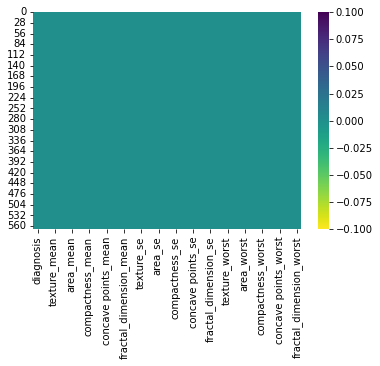

In [46]:
#checking for null values
sns.heatmap(data.isna(),cmap='viridis_r')

- There is no null values in the dataset

### Feature Selection

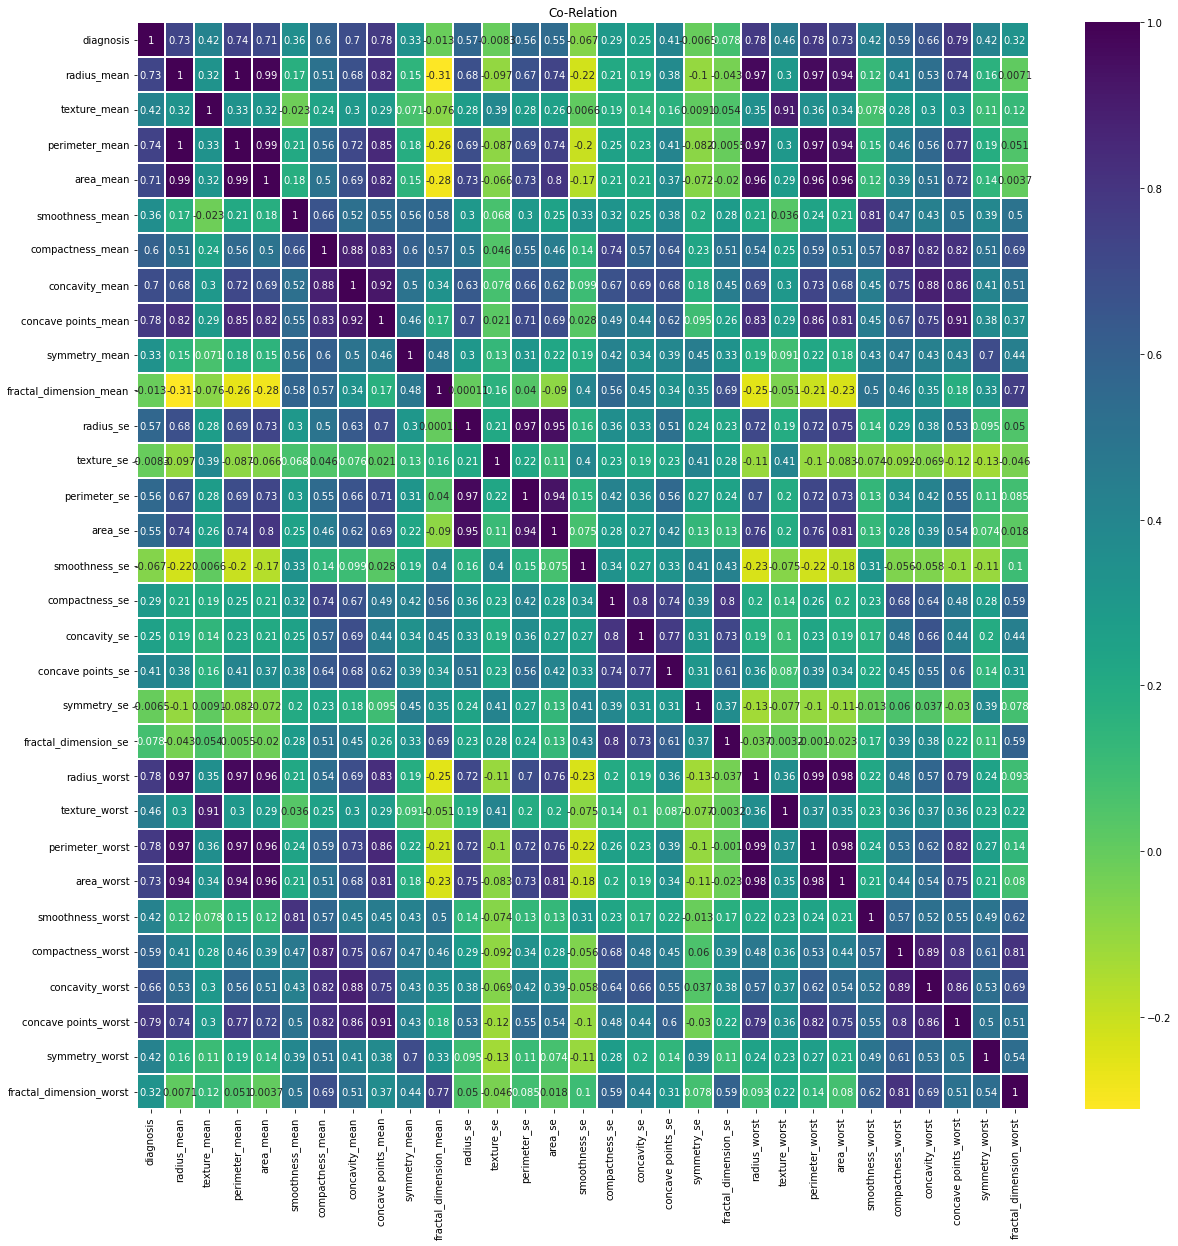

In [30]:
#encoding the categorical features
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int)
corr = data.corr()
plt.figure(figsize=(20,20))
plt.title("Co-Relation")
sns.heatmap(corr,annot=True,cmap='viridis_r',linewidths=0.2)
plt.show()

- Some features aren't correlated with the target may be we should remove them

### Getting the Relevant features

In [42]:
corr_data = abs(corr['diagnosis'])
relevant_features = corr_data[corr_data>0.25]
names = [i for i, value in relevant_features.iteritems()]
relevant_features
names.remove('diagnosis')
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


C:\Users\admin\AppData\Local\Temp\ipykernel_3576\2959552511.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [i for i, value in relevant_features.iteritems()]


### Spilting the features

In [47]:
x = data[names].values
y = data['diagnosis'].values.reshape(-1,1)

### Model Implementation

Implementaion using class
- Node Class
- Decision Tree Class

##### Node Class

In [48]:
class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

##### DecisionTree Class

In [49]:
class DecisionTree():

    def __init__(self, min_samples=2, max_depth=2):
        self.min_samples = min_samples
        self.max_depth = max_depth

        
    def split_data(self, dataset, feature, threshold):
        #create left, right datasets as empty arrays
        left_dataset = []
        right_dataset = []
        # loop over each row in the dataset
        for row in dataset:
            if row[feature] <= threshold: # compare row to threshold
                left_dataset.append(row)
            else:
                right_dataset.append(row)
        # convert left, right datasets to numpy arrays
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    
    def entropy(self, y):
        entropy = 0
        # find unique values in y
        labels = np.unique(y)
        # loop over each unique value
        for label in labels:
            # find elements in y that are equal to that label
            label_examples = y[y == label]
            # get ratio of the label
            pl = len(label_examples) / len(y)
            # calculate entropy
            entropy += -pl * np.log2(pl)
        return entropy

    
    def information_gain(self, parent, left, right):
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy 
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain 
        information_gain = parent_entropy - weighted_entropy
        return information_gain

    
    def best_split(self, dataset, num_samples, num_features):
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the featurre
            for threshold in thresholds:
                # get left and right datasetss
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split

    
    def calculate_leaf_value(self, y):
        #Convert y to list
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value

    
    
    def build_tree(self, dataset, current_depth=0):
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)

    
    def fit(self, X, y):
        dataset = np.concatenate((X, y), axis=1)  
        self.root = self.build_tree(dataset)


    
    def predict(self, X):
        predictions = []
        for x in X:
            prediction = self.make_prediction(x, self.root)
            predictions.append(prediction)
        np.array(predictions)
        return predictions
    
    
    def make_prediction(self, x, node):
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None: 
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

### Model Evaluation

##### Train Test Split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=41)
print(f"Training Shape:{x_train.shape}\nTesting Shape:{x_test.shape}")

Training Shape:(455, 25)
Testing Shape:(114, 25)


##### Model Building

In [52]:
dc_model = DecisionTree(2,2)
dc_model.fit(x_train,y_train)#fitting the model with the decision tree

In [53]:
#predicting the values - CA
y_pred = dc_model.predict(x_test)

### Model Performance

In [59]:
#accuracy score
acc_score = accuracy_score(y_test,y_pred)*100
print(f"Accuracy Score :{acc_score}%")

Accuracy Score :95.6140350877193%


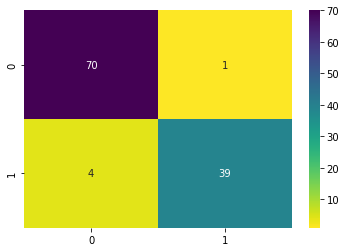

In [61]:
#confusion matrix
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cmap='viridis_r');

In [63]:
#classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        71
         1.0       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

